# Прямые методы решение СЛАУ
## Метод Гаусса и метод Гаусса с выбором главного элемента

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Невязка
def residual(A, X, F):
    return np.linalg.norm(np.dot(A,X) - F)

In [3]:
# Перестановка строк
# params: mod = {'Gauss', 'Gauss_max'}

def permutation(A, F, index, mod='Gauss'):
    prev_index = index
    
    try:
        if mod == 'Gauss':
            while A[index, prev_index] == 0 and index + 1 != A.shape[0]:
                index += 1
        elif mod == 'Gauss_max':
            index = np.nanargmax(np.where(A != 0, np.abs(A), np.NaN)[prev_index:, prev_index], axis=0) + prev_index
            
    except ValueError as error:
        pass
    
    if A[index, prev_index] != 0:
        A_i = np.array(A[index, :])
        F_i = np.array(F[index, :])

        A[index, :] = np.array(A[prev_index, :])
        F[index, :] = np.array(F[prev_index, :])

        A[prev_index, :] = A_i
        F[prev_index, :] = F_i

        return A, F, 1
    
    elif prev_index == 0:
        raise ValueError('Система уравнений не имеет решения')
    
    return A, F, 0

In [4]:
# Решение СЛАУ
# params: mod = {'Gauss', 'Gauss_max'}

def solve_SLE(A, F, mod='Gauss'):
    n = A.shape[0]
    A_copy = np.array(A)
    F_copy = np.array(F)
    
    # Приведение к диагональному виду
    for i in range(1, n):
        for j in range(i, n):
            A_copy, F_copy, flag = permutation(A_copy, F_copy, i - 1, mod)

            if flag:
                F_copy[j, 0] = F_copy[j, 0] - (A_copy[j, i - 1] / A_copy[i - 1, i - 1]) * F_copy[i - 1, 0]
                A_copy[j, :] = A_copy[j, :] - (A_copy[j, i - 1] / A_copy[i - 1, i - 1]) * A_copy[i - 1, :]

    #  Метод прогонки
    X = np.zeros((n, 1))
    X[n - 1, 0] = F_copy[n - 1, 0] / A_copy[n - 1, n - 1]   

    for k in range(n - 2, -1, -1):
        amount = 0
        for j in range(k + 1, n):
            amount += X[j, 0] * A_copy[k, j]

        X[k, 0] = (F_copy[k, 0] - amount) / A_copy[k, k]

    return X

## Исходные данные

In [5]:
n = 100

In [6]:
A = np.zeros((n, n))
F = np.zeros(n).reshape((n, 1))

In [7]:
for i in range(n):
    A[i, :] = [random.random() * 10 for _ in range(n)]
    F[i, 0] = random.random() * 10

In [8]:
# print('A = ', A, end='\n\n')
# print('F = ', F, end='\n\n')

## Метод Гаусса

In [9]:
try:
    X = solve_SLE(A, F)
except ValueError as value_error:
    print(value_error)

In [10]:
residual(A, X, F)

6.097033769407087e-11

## Метод Гаусса с выбором главного элемента

In [11]:
try:
    X = solve_SLE(A, F, mod='Gauss_max')
except ValueError as value_error:
    print(value_error)

In [12]:
residual(A, X, F)

3.967927770835757e-13

### Невязка

#### Зависимость от размерности системы

In [13]:
n_plot = []
rdual1_plot = []
rdual2_plot = []

n = 2

while n < 100:
    n_plot.append(n)
    
    A = np.zeros((n, n))
    F = np.zeros(n).reshape((n, 1))

    for i in range(n):
        A[i, :] = [random.random() * 10 for _ in range(n)]
        F[i, 0] = random.random() * 10
        
    X1 = solve_SLE(A, F)
    X2 = solve_SLE(A, F, mod='Gauss_max')
    
    rdual1_plot.append((residual(A, X1, F)))
    rdual2_plot.append((residual(A, X2, F)))
    n += 3

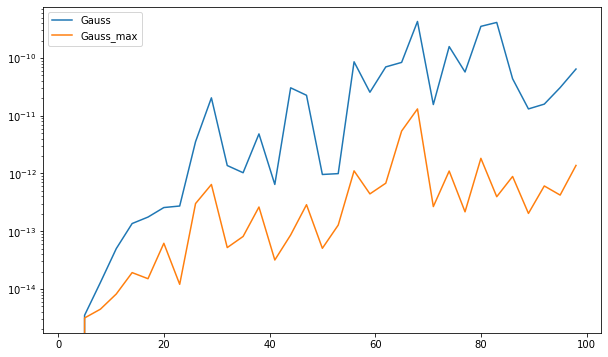

In [14]:
plt.figure(figsize=(10, 6))
plt.semilogy(n_plot, rdual1_plot, label='Gauss')
plt.semilogy(n_plot, rdual2_plot, label='Gauss_max')
plt.legend()